In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def compute_loss(y, tx, w):
    e = y - np.dot(tx,w)
    return 1/(2*len(y))*np.dot(e.transpose(),e)

In [3]:
def least_squares(y, tx):
    LS = np.dot((np.dot((np.linalg.inv(np.dot(np.transpose(tx),tx))),np.transpose(tx))),y)
    MSE = compute_loss(y,tx,LS)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    return MSE, LS

In [4]:
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
def compute_gradient(y, tx, w):
    e = y - np.dot(tx,w)
    return -1/(2*len(y))*np.dot(tx.transpose(),e)

In [6]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        G = compute_gradient(y, tx,w)
        loss = compute_loss(y, tx,w)
        w = w-gamma*G
        ws.append(w)
        losses.append(loss)
    return ws[max_iters-1]

In [7]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1

# Initialization
w_initial = np.array([10, 70])

ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

In [8]:
ws

array([72.89946567, 13.83195456])

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [9]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w_LS = least_squares(y, tx)[1]
    max_iters = 100
    gamma = 0.1

    # Initialization
    w_initial = np.array([10, 70])

    ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
    
    print("Gradient Descent W:  w0={w0}, w1={w1} ; Least Squares: w0:{w2}, W1:{w3}".format(
              w0=ws[0], w1=ws[1], w2=w_LS[0], w3=w_LS[1]))
    
    return 
        # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************

Test it here

In [10]:
test_your_least_squares()

Gradient Descent W:  w0=72.89946567085993, w1=13.831954555063074 ; Least Squares: w0:73.2939220021052, W1:13.479712434989057


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [11]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [12]:
def PI(x,degree):
    pi=np.empty([degree+1,x.shape[0]])
    for i in range(degree+1):
        pi[i] = x**i
    return pi

In [13]:
def build_poly(x, degree):
    pi=np.empty([degree+1,x.shape[0]])
    for i in range(degree+1):
        pi[i] = x**i
    res = np.transpose(pi)
    return res
        

    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************


In [14]:
build_poly(x, 12).shape

(50, 13)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [15]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # create the polynomial basis
        X_P = build_poly(x,degree)
        weights = least_squares(y, X_P)[1]
        rmse = np.sqrt(least_squares(y,X_P)[0])
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()
    
    return 

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.3336667757890794
Processing 2th experiment, degree=3, rmse=0.1828456348866184
Processing 3th experiment, degree=7, rmse=0.17653536230422046
Processing 4th experiment, degree=12, rmse=0.655367390972215


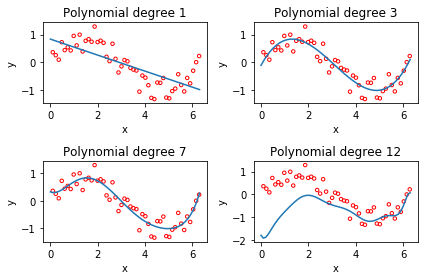

In [16]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [17]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    np.random.seed(seed)
    train_x = x[0:int(len(x)*ratio),]
    test_x = x[int(len(x)*ratio):,]
    train_y = y[0:int(len(y)*ratio),]
    test_y = y[int(len(y)*ratio):,]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    return train_x,train_y,test_x, test_y

Then, test your `split_data` function below.

In [18]:
def train_test_split_demo(x, y, degree, ratio, seed = 1):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x,train_y,test_x, test_y = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    X_P_train = build_poly(train_x,degree)
    X_P_test = build_poly(test_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    weights = least_squares(train_y, X_P_train)[1]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(compute_loss(train_y,X_P_train,weights))
    rmse_te = np.sqrt(compute_loss(test_y,X_P_test,weights))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
    return


In [19]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.345, Testing RMSE=0.210
proportion=0.9, degree=3, Training RMSE=0.188, Testing RMSE=0.137
proportion=0.9, degree=7, Training RMSE=0.182, Testing RMSE=0.131
proportion=0.9, degree=12, Training RMSE=0.189, Testing RMSE=0.132
proportion=0.5, degree=1, Training RMSE=0.324, Testing RMSE=0.387
proportion=0.5, degree=3, Training RMSE=0.184, Testing RMSE=0.189
proportion=0.5, degree=7, Training RMSE=0.164, Testing RMSE=0.221
proportion=0.5, degree=12, Training RMSE=0.419, Testing RMSE=0.455
proportion=0.1, degree=1, Training RMSE=0.422, Testing RMSE=0.351
proportion=0.1, degree=3, Training RMSE=0.019, Testing RMSE=0.316
proportion=0.1, degree=7, Training RMSE=1.826, Testing RMSE=2.165
proportion=0.1, degree=12, Training RMSE=10.631, Testing RMSE=110544.990


# 3 Ridge Regression
Please fill in the function below.

In [96]:
def ridge_regression(y, tx, lambda_):
    xtranspose = np.transpose(tx)
    xtransx = np.dot(xtranspose, tx)
    lamidentity = np.identity(xtransx.shape[0]) * (lambda_*2*len(y))
    matinv = np.linalg.inv(lamidentity + xtransx)
    xtransy = np.dot(xtranspose, y)
    weights = np.dot(matinv, xtransy)
    return weights

In [97]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x,train_y,test_x, test_y = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    X_P_train = build_poly(train_x,degree)
    X_P_test = build_poly(test_x,degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights = ridge_regression(train_y,X_P_train,lambda_)
        rmse_tr.append(np.sqrt(compute_loss(train_y,X_P_train,weights)))
        rmse_te.append(np.sqrt(compute_loss(test_y,X_P_test,weights)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    return


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.164, Testing RMSE=0.214
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.166, Testing RMSE=0.209
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.168, Testing RMSE=0.204
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.171, Testing RMSE=0.200
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.173, Testing RMSE=0.197
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.175, Testing RMSE=0.196
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.175, Testing RMSE=0.195
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.176, Testing RMSE=0.194
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.177, Testing RMSE=0.192
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.178, Testing RMSE=0.190
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.181, Testing RMSE=0.188
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.190, Testing RMSE=0.189
proportion=0.5, degree=7, lambda=0.193, 

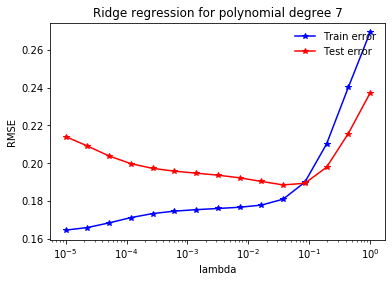

In [98]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)